In [96]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# importing data from local
df = pd.read_csv("INF2178_A1_data_CSV.csv") 

In [97]:
# provide an overview of the dataset with specific examples from the top 15 rows
print(df.shape)
df.head(15)

(50944, 14)


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [93]:
# see the cases at the end of a df
df.tail()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN
50943,2021-12-31,YouthLink,14911,YouthLink Transitional Program,Mixed Adult,Transitional,Shelter,Base Shelter and Overnight Services System,29,Bed Based Capacity,29.0,29.0,NaN,NaN


In [94]:
# populated the general stats for the df
df.describe()

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598
std,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954
min,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000


In [87]:
# choose some column in interest and see all the options under those columns
columns_to_check = ['PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'CAPACITY_TYPE']

# Iterate over the list of columns
for column in columns_to_check:
    # Check if column exists in DataFrame to avoid KeyError
    if column in df.columns:
        print(f"Unique values in '{column}':")
        print(df[column].unique())
        
        # Print counts for each unique value
        print(f"Counts of unique values in '{column}':")
        print(df[column].value_counts())
        print("\n")  # Adds a newline for readability
    else:
        print(f"Column '{column}' not found in DataFrame.")

Unique values in 'PROGRAM_MODEL':
['Emergency' 'Transitional' nan]
Counts of unique values in 'PROGRAM_MODEL':
PROGRAM_MODEL
Emergency       41541
Transitional     9401
Name: count, dtype: int64


Unique values in 'OVERNIGHT_SERVICE_TYPE':
['Motel/Hotel Shelter' 'Shelter' 'Interim Housing'
 'Isolation/Recovery Site' '24-Hour Respite Site' 'Warming Centre'
 "24-Hour Women's Drop-in" nan]
Counts of unique values in 'OVERNIGHT_SERVICE_TYPE':
OVERNIGHT_SERVICE_TYPE
Shelter                    31465
Motel/Hotel Shelter        14280
24-Hour Respite Site        2997
Isolation/Recovery Site      778
Interim Housing              720
24-Hour Women's Drop-in      515
Warming Centre               187
Name: count, dtype: int64


Unique values in 'CAPACITY_TYPE':
['Room Based Capacity' 'Bed Based Capacity']
Counts of unique values in 'CAPACITY_TYPE':
CAPACITY_TYPE
Bed Based Capacity     32399
Room Based Capacity    18545
Name: count, dtype: int64




In [ ]:
# Categories and counts for PROGRAM_MODEL
print("Categories and counts for PROGRAM_MODEL:")
print(df['PROGRAM_MODEL'].value_counts())
print("\n")  # Adds a newline for readability

# Categories and counts for OVERNIGHT_SERVICE_TYPE
print("Categories and counts for OVERNIGHT_SERVICE_TYPE:")
print(df['OVERNIGHT_SERVICE_TYPE'].value_counts())
print("\n")

# Categories and counts for CAPACITY_TYPE
print("Categories and counts for CAPACITY_TYPE:")
print(df['CAPACITY_TYPE'].value_counts())
print("\n")

In [59]:
# check the how many null in this dataset for each column
null_counts = df.isnull().sum()
print(null_counts)

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64


In [60]:
# Initial calculation of occupancy rates for the original dataset (before cleaning)
df_original = pd.read_csv("INF2178_A1_data_CSV.csv") 
df_original['OCCUPANCY_RATE_BEDS'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df_original['OCCUPANCY_RATE_ROOMS'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

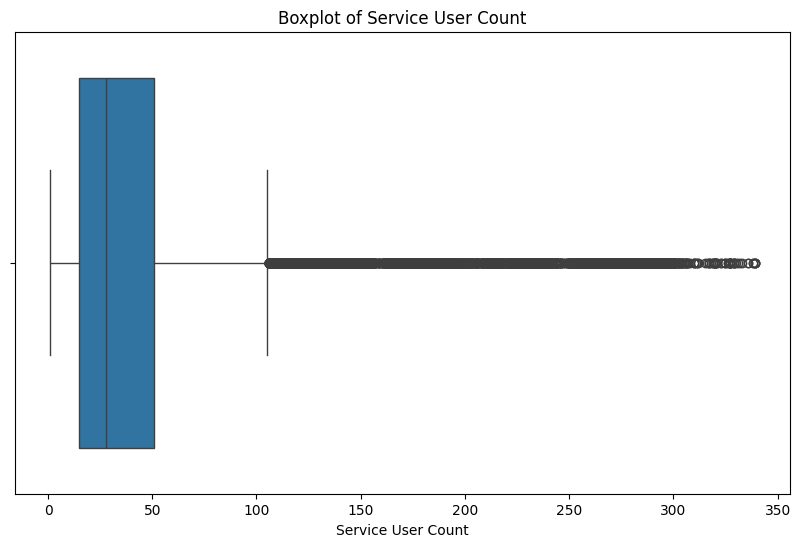

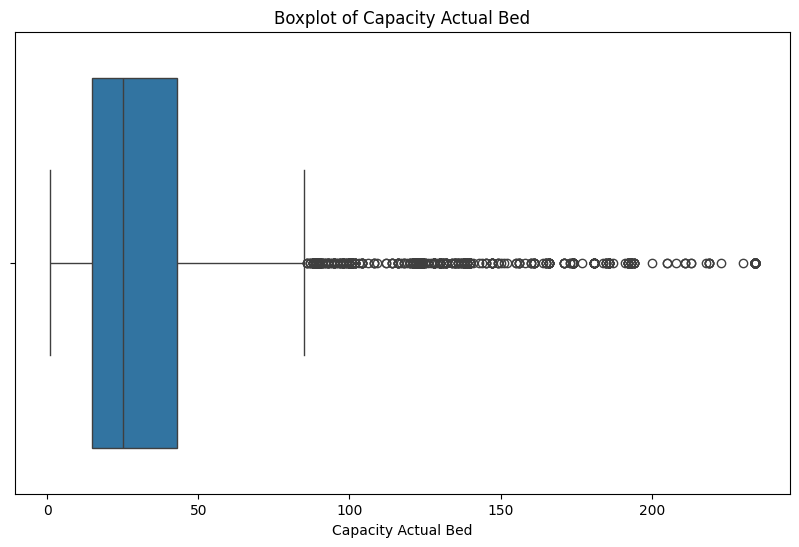

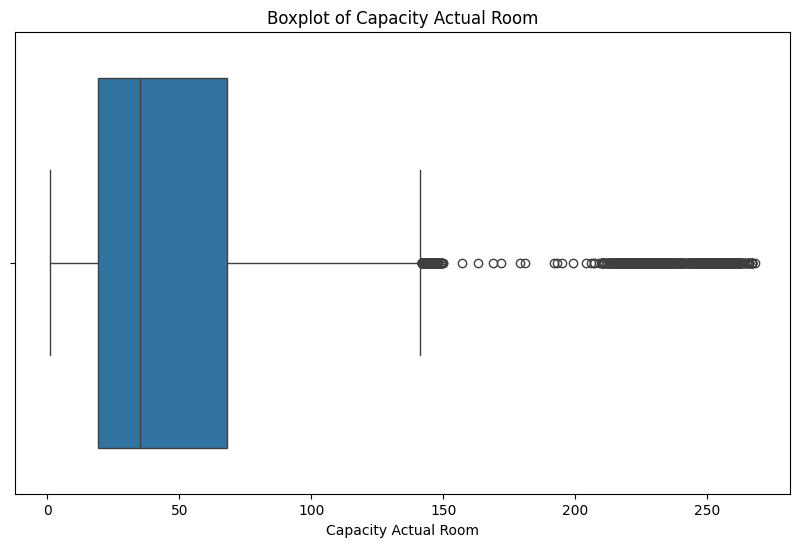

In [92]:
# The visuals help to seee the overall trend in this begining phase, so that outstanding cases will be identified

# Boxplot for Service User Count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['SERVICE_USER_COUNT'])
plt.title('Boxplot of Service User Count')
plt.xlabel('Service User Count')
plt.show()

# Boxplot for Capacity Actual Bed
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['CAPACITY_ACTUAL_BED'])
plt.title('Boxplot of Capacity Actual Bed')
plt.xlabel('Capacity Actual Bed')
plt.show()

# Boxplot for Capacity Actual Room
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['CAPACITY_ACTUAL_ROOM'])
plt.title('Boxplot of Capacity Actual Room')
plt.xlabel('Capacity Actual Room')
plt.show()

In [62]:
# examine the occupancy rate by replacing the NaN value to 0
df_original.fillna({'OCCUPANCY_RATE_BEDS': 0, 'OCCUPANCY_RATE_ROOMS': 0}, inplace=True)

# Calculate the overall occupancy rate by combining bed and room based occupancy to one column "OCCUPANCY_RATE" for further use
df_original['OCCUPANCY_RATE'] = df_original.apply(lambda x: x['OCCUPANCY_RATE_BEDS'] if x['CAPACITY_TYPE'] == 'Bed Based Capacity' else x['OCCUPANCY_RATE_ROOMS'], axis=1)

df_original['OCCUPANCY_RATE']

0        0.896552
1        1.000000
2        0.821429
3        1.000000
4        0.928571
           ...   
50939    0.300000
50940    1.000000
50941    0.928571
50942    1.000000
50943    1.000000
Name: OCCUPANCY_RATE, Length: 50944, dtype: float64

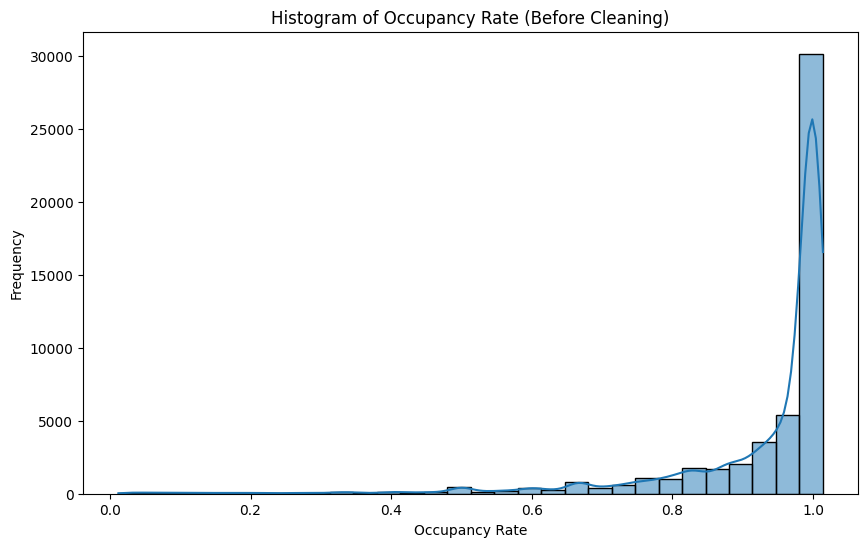

In [63]:
# Histogram for Occupancy Rate (Before Cleaning)
plt.figure(figsize=(10, 6))
sns.histplot(df_original['OCCUPANCY_RATE'], bins=30, kde=True)
plt.title('Histogram of Occupancy Rate (Before Cleaning)')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

#### Principle 1: Each Variable Forms a Column
This principle is already satisfied. Our dataset's structure ensures that each variable, such as OCCUPANCY_DATE, ORGANIZATION_NAME, CAPACITY_ACTUAL_BED, etc., is represented by its own column.

#### Principle 2: Each Observation Forms a Row
This principle is also satisfied. Each row in the dataset represents a unique observation of shelter occupancy on a given date, ensuring a clean, observational unit-based structure.

#### Principle 3: Each Type of Observational Unit Forms a Table

Given that our dataset is focused on a single observational unit (daily shelter occupancy and capacity), this principle is naturally upheld. There's no need for multiple tables or pivoting since the dataset is already structured around this singular observational focus.

#### Principle 4: Each Column Contains Only One Variable

This principle is satisfied as well. Each column in our dataset represents a single variable without the need for splitting. Variables like CAPACITY_ACTUAL_BED, OCCUPIED_BEDS, etc., are clearly defined and contain only one type of information.

#### Principle 5: Data Cleaning Needs

Our dataset does require cleaning, particularly concerning missing values and logically impossible values (e.g., occupancy rates that are not calculable due to missing capacity or occupancy data). The cleaning steps will focus on:
Identifying and handling missing values in key columns (CAPACITY_ACTUAL_BED, OCCUPIED_BEDS, CAPACITY_ACTUAL_ROOM, OCCUPIED_ROOMS).
Calculating occupancy rates correctly, ensuring that the calculation respects the capacity type (bed-based or room-based) and does not produce misleading results due to missing or zero values.


In [67]:
# Step 1: Handling Missing Values
# For CAPACITY_ACTUAL_BED and CAPACITY_ACTUAL_ROOM, I assume missing values are due to the program type and not adjust these.
# For OCCUPIED_BEDS and OCCUPIED_ROOMS, I need to ensure missing values do not interfere with calculations.

# Excluding records where both bed and room capacities are missing or both occupied beds and rooms are missing
df_clean = df_original.dropna(subset=['CAPACITY_ACTUAL_BED', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_BEDS', 'OCCUPIED_ROOMS'], how='all')

In [65]:
# Step 2: Recalculate Occupancy Rates with cleaned data
df_clean['OCCUPANCY_RATE_BEDS'] = df_clean['OCCUPIED_BEDS'] / df_clean['CAPACITY_ACTUAL_BED'].replace(0, np.nan)  # Avoid division by zero
df_clean['OCCUPANCY_RATE_ROOMS'] = df_clean['OCCUPIED_ROOMS'] / df_clean['CAPACITY_ACTUAL_ROOM'].replace(0, np.nan)  # Avoid division by zero
df_clean['OCCUPANCY_RATE'] = df_clean.apply(
    lambda x: x['OCCUPANCY_RATE_BEDS'] if x['CAPACITY_TYPE'] == 'Bed Based Capacity' else x['OCCUPANCY_RATE_ROOMS'], 
    axis=1)

# Clean out rows where the occupancy rate calculation was not possible due to missing data
df_clean = df_clean.dropna(subset=['OCCUPANCY_RATE'])

In [68]:
# Step 3: Address Illogical '0' Values
# Given the specific context, '0' values in capacity or occupancy might already be handled by excluding or recalculating occupancy rates.
# Ensure no illogical zero values persist in occupancy rates
df_clean = df_clean[df_clean['OCCUPANCY_RATE'] <= 1]  # Exclude any rates over 100%, assuming no overcapacity is reported.

# Display the cleaned data summary to verify changes
df_clean.describe(include='all').transpose()[['count', 'mean', 'std', 'min', '50%', 'max']]

,count,mean,std,min,50%,max
OCCUPANCY_DATE,50940,NaN,NaN,NaN,NaN,NaN
ORGANIZATION_NAME,50940,NaN,NaN,NaN,NaN,NaN
PROGRAM_ID,50940.0,13985.968414,1705.263033,11791.0,14251.0,16631.0
PROGRAM_NAME,50905,NaN,NaN,NaN,NaN,NaN
SECTOR,50940,NaN,NaN,NaN,NaN,NaN
PROGRAM_MODEL,50938,NaN,NaN,NaN,NaN,NaN
OVERNIGHT_SERVICE_TYPE,50938,NaN,NaN,NaN,NaN,NaN
PROGRAM_AREA,50938,NaN,NaN,NaN,NaN,NaN
SERVICE_USER_COUNT,50940.0,45.721339,53.324007,1.0,28.0,339.0
CAPACITY_TYPE,50940,NaN,NaN,NaN,NaN,NaN


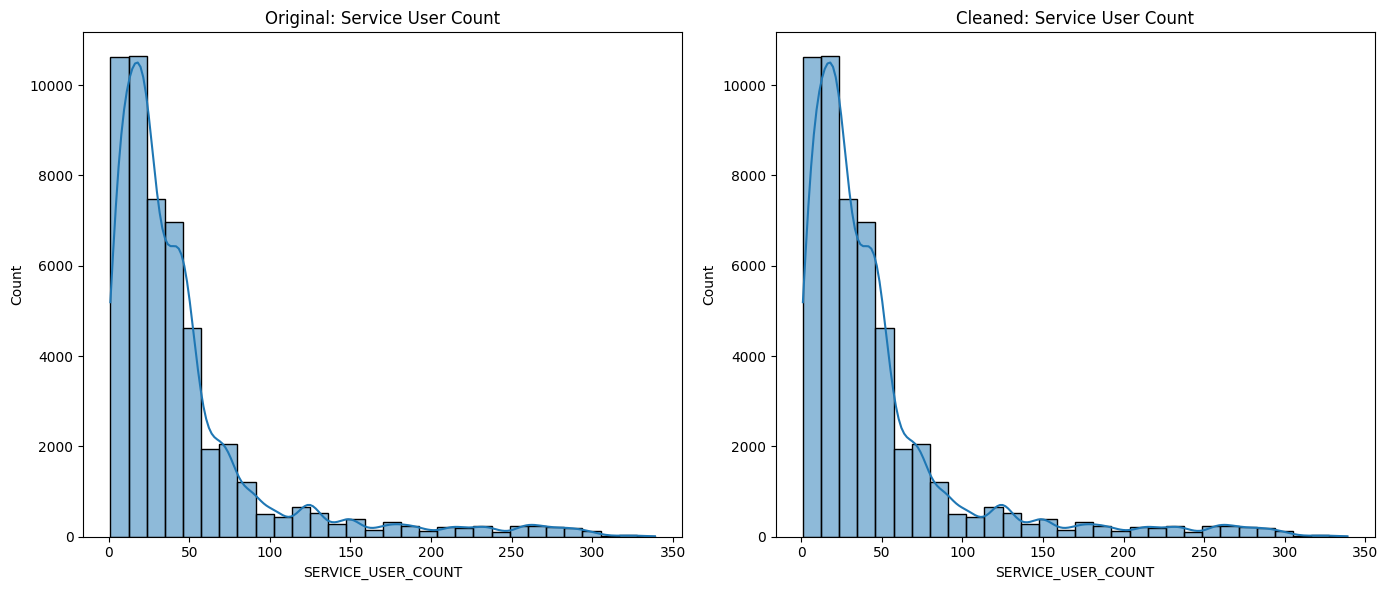

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# the diagrams illustrate the impact of the cleaning process on the dataset's structure and the distribution of key variables.
# the first combination is comparing the original service user count to cleaned version. The cleaned one is tend to be more uniformed

plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df_original['SERVICE_USER_COUNT'], bins=30, kde=True)
plt.title('Original: Service User Count')

# Cleaned
plt.subplot(1, 2, 2)
sns.histplot(df_clean['SERVICE_USER_COUNT'], bins=30, kde=True)
plt.title('Cleaned: Service User Count')

plt.tight_layout()
plt.show()

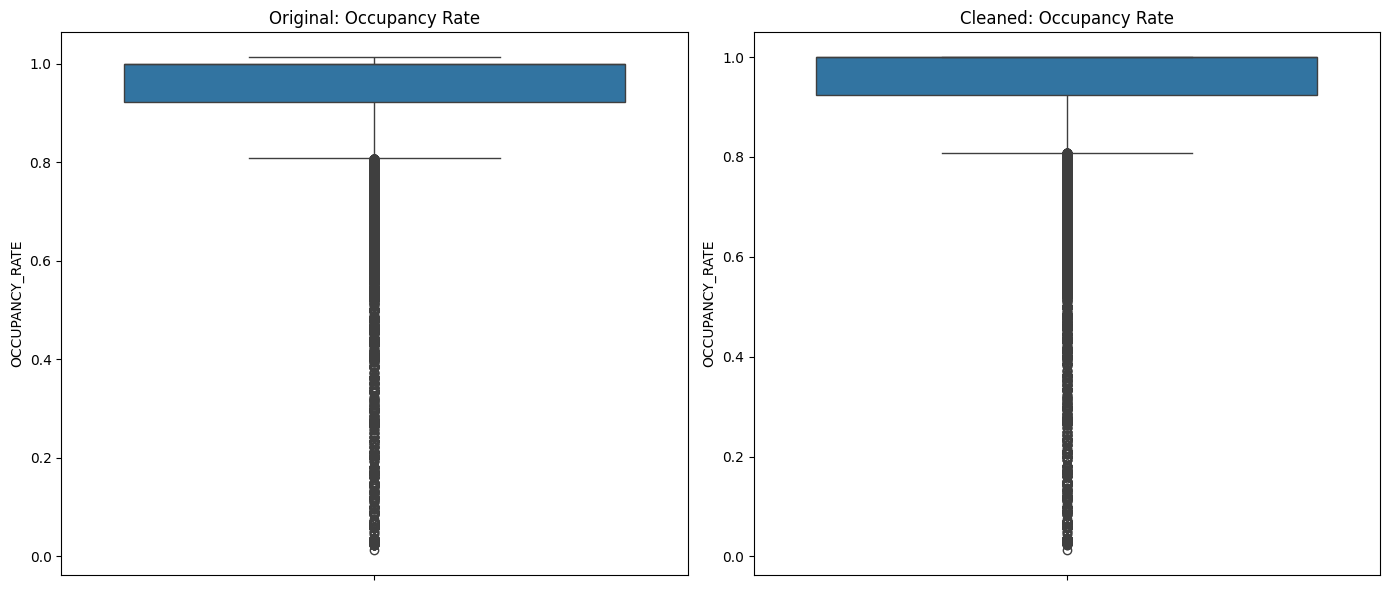

In [90]:
# the Boxplots for OCCUPANCY_RATE illustrates the outlier of before and after cleaning results
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.boxplot(y=df_original['OCCUPANCY_RATE'])
plt.title('Original: Occupancy Rate')

# Cleaned
plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['OCCUPANCY_RATE'])
plt.title('Cleaned: Occupancy Rate')

plt.tight_layout()
plt.show()


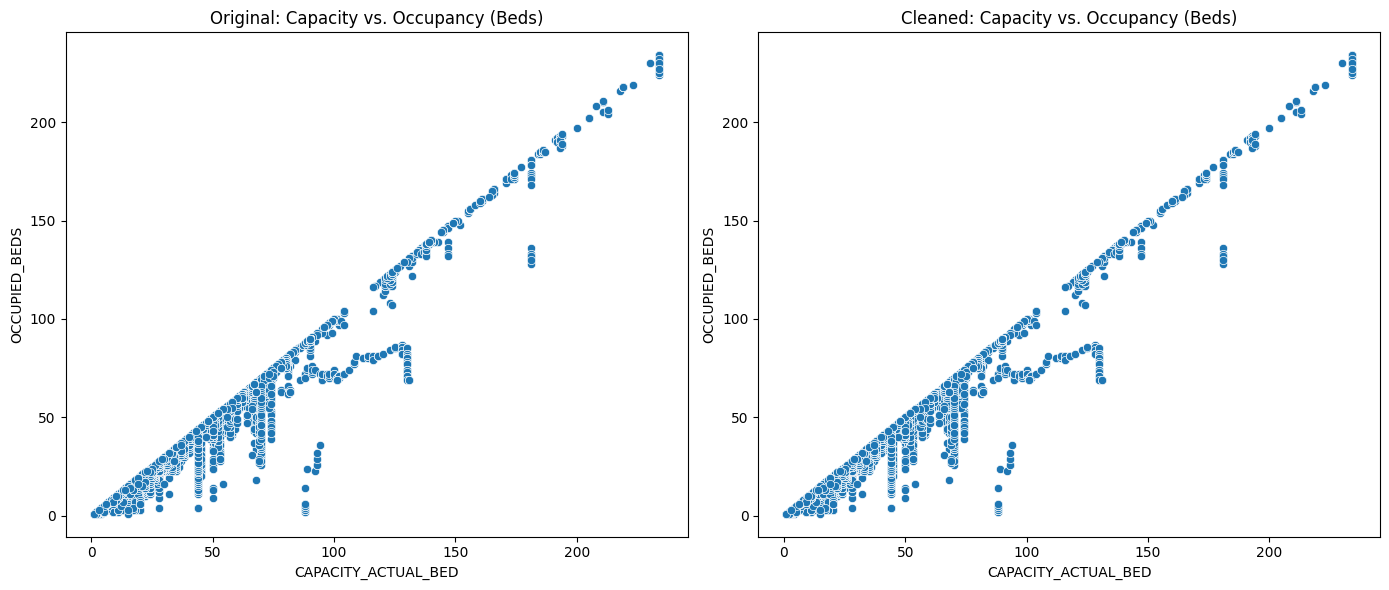

In [89]:
# the Scatter Plot for CAPACITY_ACTUAL_BED vs. OCCUPIED_BEDS shows the relationship of occupied beds and capacity comparison
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.scatterplot(x='CAPACITY_ACTUAL_BED', y='OCCUPIED_BEDS', data=df_original)
plt.title('Original: Capacity vs. Occupancy (Beds)')

# Cleaned
plt.subplot(1, 2, 2)
sns.scatterplot(x='CAPACITY_ACTUAL_BED', y='OCCUPIED_BEDS', data=df_clean)
plt.title('Cleaned: Capacity vs. Occupancy (Beds)')

plt.tight_layout()
plt.show()


In [88]:
# shows the original data summary for interested columns comparing to the cleaned dataset 
# This statistic could show more minor changes in changes than graphics
print("Original Data Summary:")
print(df_original[['SERVICE_USER_COUNT', 'OCCUPANCY_RATE', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS']].describe())

print("\nCleaned Data Summary:")
print(df_clean[['SERVICE_USER_COUNT', 'OCCUPANCY_RATE', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS']].describe())

Original Data Summary:
       SERVICE_USER_COUNT  OCCUPANCY_RATE  CAPACITY_ACTUAL_BED  OCCUPIED_BEDS
count        50944.000000    50944.000000         32399.000000   32399.000000
mean            45.727171        0.930142            31.627149      29.780271
std             53.326049        0.138788            27.127682      26.379416
min              1.000000        0.012048             1.000000       1.000000
25%             15.000000        0.923077            15.000000      14.000000
50%             28.000000        1.000000            25.000000      23.000000
75%             51.000000        1.000000            43.000000      41.000000
max            339.000000        1.014085           234.000000     234.000000

Cleaned Data Summary:
       SERVICE_USER_COUNT  OCCUPANCY_RATE  CAPACITY_ACTUAL_BED  OCCUPIED_BEDS
count        50940.000000    50940.000000         32399.000000   32399.000000
mean            45.721339        0.930136            31.627149      29.780271
std             53

## T Test 

In [74]:
# Filter the dataset for Emergency and Transitional programs
emergency_occupancy_rates = df_clean[df_clean['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional_occupancy_rates = df_clean[df_clean['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(emergency_occupancy_rates, transitional_occupancy_rates, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 39.06906374293522, P-value: 0.0


In [84]:
# Filter the dataset for Shelter and Motel/Hotel service types
shelter_occupancy_rates = df_clean[df_clean['OVERNIGHT_SERVICE_TYPE'] == 'Shelter']['OCCUPANCY_RATE']
motel_occupancy_rates = df_clean[df_clean['OVERNIGHT_SERVICE_TYPE'] == 'Motel/Hotel Shelter']['OCCUPANCY_RATE']

# Perform an independent samples t-test between Shelter and Motel/Hotel
t_stat, p_value = stats.ttest_ind(shelter_occupancy_rates, motel_occupancy_rates, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -37.92963658991663, P-value: 5.5121886549851e-310
